In [4]:
def getEntropy(li):
    result = 0
    for l in li:
        result += -l*np.log2(l)
    return result

In [5]:
getEntropy([1/2, 1/2])

1.0

In [6]:
getEntropy([1/3, 2/3])

0.9182958340544896

In [7]:
getEntropy([3/4, 1/4])

0.8112781244591328

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [0, 1]]
y = iris.target

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [12]:
def changeMaxDepth(m_d, X, y):
    tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=m_d, random_state=0).fit(X, y)
    return tree1

In [13]:
tree1 = changeMaxDepth(1, X, y)

In [14]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

NameError: name 'mpl' is not defined

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[47,  0,  3],
       [11,  0, 39],
       [ 1,  0, 49]])

In [17]:
from sklearn.model_selection import *
import numpy as np
m_d = list(range(1, 11))
scores_li = []
cv = KFold(5)
scores = np.zeros(10)
for i, md in enumerate(m_d):
    tree = changeMaxDepth(md, X, y)
    scores_li.append(cross_val_score(tree, X, y, cv=cv))


In [45]:
scores_li

[array([0.9       , 0.6       , 0.        , 0.26666667, 0.        ]),
 array([0.9       , 0.7       , 0.13333333, 0.33333333, 0.        ]),
 array([0.9       , 0.7       , 0.3       , 0.76666667, 0.2       ]),
 array([0.9       , 0.7       , 0.23333333, 0.76666667, 0.2       ]),
 array([0.9       , 0.73333333, 0.23333333, 0.76666667, 0.46666667]),
 array([0.9       , 0.73333333, 0.13333333, 0.76666667, 0.43333333]),
 array([0.9       , 0.73333333, 0.13333333, 0.73333333, 0.43333333]),
 array([0.9       , 0.73333333, 0.13333333, 0.7       , 0.33333333]),
 array([0.9       , 0.73333333, 0.13333333, 0.53333333, 0.3       ]),
 array([0.9       , 0.73333333, 0.16666667, 0.66666667, 0.3       ])]

In [42]:
score_mean = []
for li in scores_li:
    score_mean.append(li.mean())

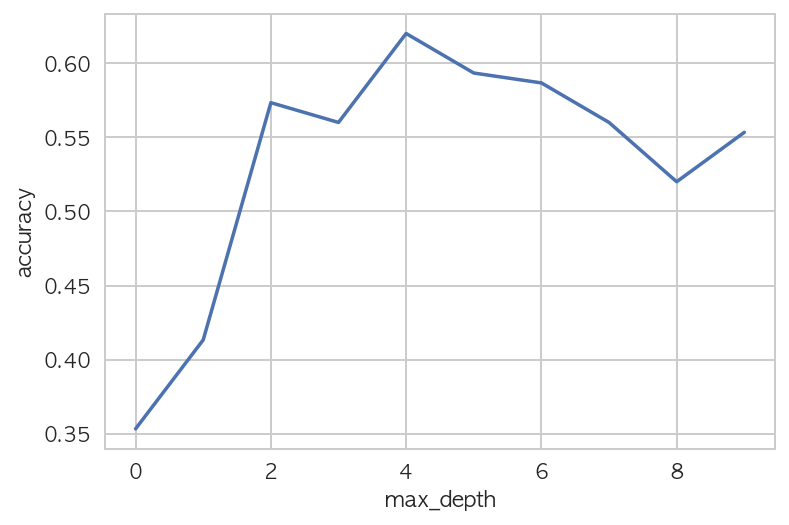

In [44]:
plt.ylabel("accuracy")
plt.xlabel("max_depth")
plt.plot(score_mean)

In [40]:
scores_li[0].mean()

0.35333333333333333